In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.impute import SimpleImputer

### Predicting the median House Price value  of all houses in a block in California using Latitude of the house, Longitude of the house, Total rooms in the house, the median house age, median income and Ocean proximity. 

Field and Description

longitude (signed numeric - float) : Longitude value for the block in California, USA
latitude (numeric - float ) : Latitude value for the block in California, USA
housing_median_age (numeric - int ) : Median age of the house in the block
total_rooms (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
total_bedrooms (numeric - float ) : Count of the total number of bedrooms in all houses in the block
population (numeric - int ) : Count of the total number of population in the block
households (numeric - int ) : Count of the total number of households in the block
median_income (numeric - float ) : Median of the total household income of all the houses in the block
ocean_proximity (numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]
median_house_value (numeric - int ) : Median of the household prices of all the houses in the block

In [113]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [114]:
from category_encoders import OneHotEncoder

In [115]:
df = pd.read_csv('/Users/HP/Downloads/housing.csv')

In [116]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [118]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [119]:
df.select_dtypes('number').head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [120]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [121]:
d = df.select_dtypes('number').drop(columns='median_house_value').corr()

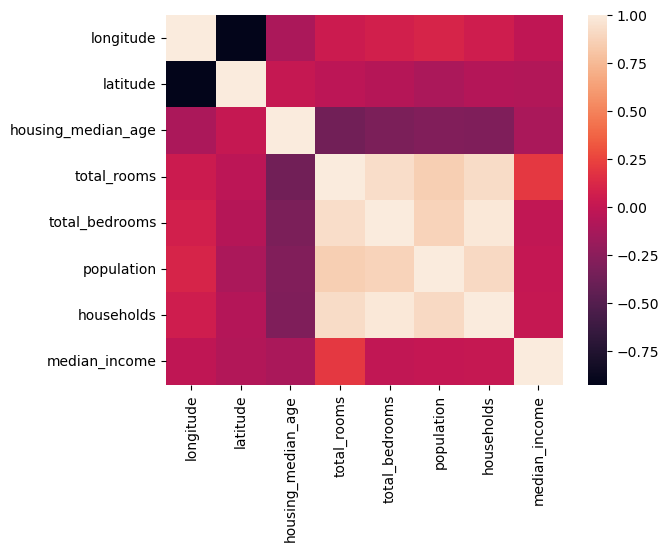

In [122]:
sns.heatmap(d);

In [123]:
df['population'].corr(df['median_house_value'])

-0.0246496788888949

In [124]:
df['total_rooms'].corr(df['median_house_value'])

0.13415311380656308

In [125]:
df['total_bedrooms'].corr(df['median_house_value'])

0.049686180247345904

In [126]:
df['households'].corr(df['median_house_value'])

0.06584265057005646

In [127]:
# Dropping multicolinar columns
df.drop(columns=['population','total_bedrooms','households'],inplace=True)

In [128]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,3.8462,NEAR BAY,342200


In [129]:

X = df.drop(columns='median_house_value')

In [130]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,median_income,ocean_proximity
0,-122.23,37.88,41,880,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,3.8462,NEAR BAY


In [131]:
y = df['median_house_value']

In [132]:
print(X.shape)
print(y.shape)

(20640, 6)
(20640,)


In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [134]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,median_income,ocean_proximity
14196,-117.03,32.71,33,3126,3.2596,NEAR OCEAN
8267,-118.16,33.77,49,3382,3.8125,NEAR OCEAN
17445,-120.48,34.66,4,1897,4.1563,NEAR OCEAN
14265,-117.11,32.69,36,1421,1.9425,NEAR OCEAN
2271,-119.80,36.78,43,2382,3.5542,INLAND


In [135]:
y_train.head()

14196    103000
8267     382100
17445    172600
14265     93400
2271      96500
Name: median_house_value, dtype: int64

### Building a Baseline

In [136]:
Baseline = [y_train.mean()] * len(y_train)

In [137]:
Baseline[:5]

[207194.6937378876,
 207194.6937378876,
 207194.6937378876,
 207194.6937378876,
 207194.6937378876]

In [167]:
MAE = mean_absolute_error(y_train,Baseline)
#MSE = mean_squared_error(y_train,Baseline)
print("Baseline Mean Absolute Error :",MAE)
#print("Baseline Mean Squared Error :",MSE)

Baseline Mean Absolute Error : 91391.14988721792


### Creating the Model

In [196]:
model = make_pipeline(OneHotEncoder(),LinearRegression())

In [197]:
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=['ocean_proximity'])),
                ('linearregression', LinearRegression())])

In [198]:
y_pred = model.predict(X_train)

In [199]:
MAE = mean_absolute_error(y_train,y_pred)
#MSE = mean_squared_error(y_train,y_pred)
print("Model Mean Absolute Error :",MAE)
#print("Model Mean Squared Error :",MSE)

Model Mean Absolute Error : 52639.822482328644


In [200]:
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0     62184.134625
1    135964.601348
2    257351.419408
3    287984.790679
4    263103.870348
dtype: float64

In [201]:
MAE = mean_absolute_error(y_test,y_pred_test)
#MSE = mean_squared_error(y_test,X)
print("Model Test Mean Absolute Error :",MAE)
#print("Model Test Mean Squared Error :",MSE)

Model Test Mean Absolute Error : 52663.964428632724


### Communication of result

In [207]:
coefficients = model.named_steps['linearregression'].coef_.round()
features = ["longitude","latitude","housing_median_age","total_rooms","median_income","ocean_proximity_<1H OCEAN","ocean_proximity_INLAND","ocean_proximity_ISLAND","ocean_proximity_NEAR BAY","ocean_proximity_NEAR OCEAN"]

In [208]:
coefficients

array([-2.4565e+04, -2.2921e+04,  1.0490e+03,  3.0000e+00,  3.6958e+04,
       -1.5159e+04, -6.9280e+04, -2.4027e+04, -2.1344e+04,  1.2981e+05])

In [215]:
feat_imp = pd.Series(coefficients,index=features)

In [218]:
feat_imp

longitude                     -24565.0
latitude                      -22921.0
housing_median_age              1049.0
total_rooms                        3.0
median_income                  36958.0
ocean_proximity_<1H OCEAN     -15159.0
ocean_proximity_INLAND        -69280.0
ocean_proximity_ISLAND        -24027.0
ocean_proximity_NEAR BAY      -21344.0
ocean_proximity_NEAR OCEAN    129810.0
dtype: float64

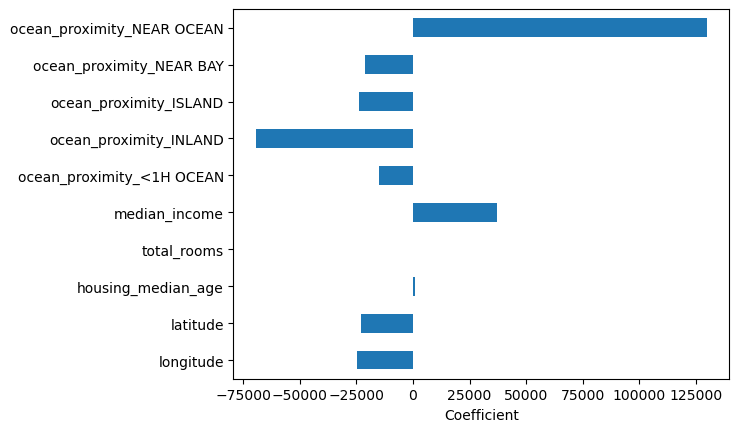

In [217]:
feat_imp.plot(kind='barh',xlabel='Coefficient');